# Środowisko **MountainCar**

**Pojazd** znajduje się na **jednowymiarowym torze** (**patrz rysunek poniżej**), umieszczonym pomiędzy dwoma wzniesieniami. **Celem jest wjechanie pojazdu na górę po prawej stronie** (miejsce oznaczone chorągiewką). Silnik samochodu nie jest wystarczająco mocny, aby bezpośrednio wjechać na górę. **Możliwym rozwiązaniem jest jazda "tam iz powrotem", w lewo i prawo i nabranie rozpędu**. 

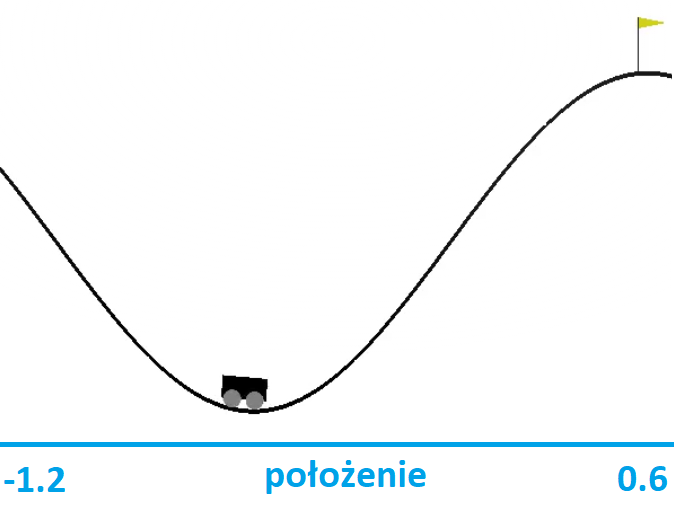

In [3]:
import numpy as np
import gym
import matplotlib.pyplot as plt

**Stan** reprezentowany jest za pomocą wektora **[położenie,prędkość]**. **Stan początkowy** ma losowe **położenie od -0,6 do -0,4** (położenie w dolinie) i **prędkość=0**:

In [4]:
env = gym.make("MountainCar-v0")
State_0 = env.reset()
State_0

array([-0.53757159,  0.        ])

Wartości **min** i **max** położenia oraz prędkości:

In [5]:
print("położenie min=",env.observation_space.low[0]," max=",env.observation_space.high[0])
print("prędkość min=",env.observation_space.low[1]," max=",env.observation_space.high[1])

położenie min= -1.2  max= 0.6
prędkość min= -0.07  max= 0.07


# Akcje

Możliwe do wykonania są **3 akcje**, oznaczone **0,1,2**:

In [6]:
env.action_space

Discrete(3)

Przetestujmy **akcję 0** - wykonajmy ją **10 razy**:

In [7]:
env.reset()
for _ in range(10):
    action = 0
    obs, reward, done, info = env.step(action)
    print("stan=",obs)

stan= [-0.54402818 -0.00085326]
stan= [-0.54572832 -0.00170014]
stan= [-0.54826261 -0.00253429]
stan= [-0.55161209 -0.00334948]
stan= [-0.55575172 -0.00413963]
stan= [-0.56065057 -0.00489885]
stan= [-0.56627211 -0.00562154]
stan= [-0.57257447 -0.00630236]
stan= [-0.57951083 -0.00693636]
stan= [-0.58702981 -0.00751899]


Jak widać powyżej akcja 0 powoduje **pchnięcie pojazdu w lewą stronę** (zmniejszeniu ulega pierwsza współrzędna) i **zwiększeniu ulega prędkość pojazdu w lewą stronę** (druga współrzędna - ujemna wartość prędkości).

W przypadku pozostałych akcji: **1 - brak pchnięcia pojazdu**, **2 - popchnięcie w prawo**.

Przetestujmy działanie środowiska - **wykonajmy pewną ilość (dokładnie 50) akcji 0** (pchnięcie pojazdu w lewą stronę):

In [8]:
env.reset()
for _ in range(50):
    action = 0
    obs, reward, done, info = env.step(action)
    print("położenie: ",obs[0]," prędkość: ",obs[1])
    if obs[1]<0:
      print("pojazd porusza się w LEWO")
    else:
      print("pojazd porusza się w PRAWO")

położenie:  -0.4923972796370638  prędkość:  -0.001242949307119431
pojazd porusza się w LEWO
położenie:  -0.4948738985869782  prędkość:  -0.0024766189499144022
pojazd porusza się w LEWO
położenie:  -0.49856568757238695  prędkość:  -0.003691788985408749
pojazd porusza się w LEWO
położenie:  -0.5034450482876252  prędkość:  -0.004879360715238208
pojazd porusza się w LEWO
położenie:  -0.509475469883213  prędkość:  -0.0060304215955878145
pojazd porusza się w LEWO
położenie:  -0.5166117845816361  prędkość:  -0.0071363146984231764
pojazd porusza się w LEWO
położenie:  -0.5248004978754922  prędkość:  -0.008188713293856094
pojazd porusza się w LEWO
położenie:  -0.5339801982717932  prędkość:  -0.009179700396300955
pojazd porusza się w LEWO
położenie:  -0.5440820505844589  prędkość:  -0.010101852312665704
pojazd porusza się w LEWO
położenie:  -0.5550303749996074  prędkość:  -0.010948324415148522
pojazd porusza się w LEWO
położenie:  -0.5667433116069046  prędkość:  -0.011712936607297247
pojazd poru

Jak widać powyżej pojazd **początkowo porusza się w lewo**, ale **po pewnym czasie zaczyna opadać, czyli poruszać się w prawo**. W tym momencie prędkość pojazdu zmienia wartość z ujemnej (prędkość w lewo) na dodatnią (prędkość w prawo). 

Zobaczmy co się dzieje dalej. Spróbujmy wykonać teraz pewną ilość razy **akcję 1 czyli brak pchnięcia** (UWAGA: **nie resetujemy stanu środowiska!!!**):

In [9]:
for _ in range(50):
    action = 1
    obs, reward, done, info = env.step(action)
    print("położenie: ",obs[0]," prędkość: ",obs[1])
    if obs[1]<0:
      print("pojazd porusza się w LEWO")
    else:
      print("pojazd porusza się w PRAWO")

położenie:  -0.7638052795336768  prędkość:  0.012407446909949785
pojazd porusza się w PRAWO
położenie:  -0.7497482068788957  prędkość:  0.014057072654781228
pojazd porusza się w PRAWO
położenie:  -0.7341221699663013  prędkość:  0.01562603691259439
pojazd porusza się w PRAWO
położenie:  -0.7170201010979536  prędkość:  0.01710206886834781
pojazd porusza się w PRAWO
położenie:  -0.6985474204191632  prędkość:  0.01847268067879033
pojazd porusza się w PRAWO
położenie:  -0.6788220405350534  prędkość:  0.019725379884109794
pojazd porusza się w PRAWO
położenie:  -0.6579741072062937  prędkość:  0.020847933328759692
pojazd porusza się w PRAWO
położenie:  -0.636145434710401  prędkość:  0.02182867249589274
pojazd porusza się w PRAWO
położenie:  -0.6134886091067158  prędkość:  0.022656825603685152
pojazd porusza się w PRAWO
położenie:  -0.5901657512621504  prędkość:  0.023322857844565347
pojazd porusza się w PRAWO
położenie:  -0.5663469528914487  prędkość:  0.023818798370701756
pojazd porusza się w

Po zmianach położenia widać, że **pojazd początkowo kontynuuje ruch w prawo** (wartość położenia ulega zwiększeniu) czyli **podjeżdża pod wzniesienie z prawej strony**. Po pewnym czasie jednak **prędkość zmienia wartość z dodatniej na ujemną** co oznacza, że **pojazd zaczyna opadać czyli porusza się w lewo**.  

# Nagrody

Nagroda wynosi **-1 za każdy krok czasowy**, aż do osiągnięcia **docelowej pozycji 0.5** (położenie chorągiewki). 

# Zakończenie epizodu

Zakończenie epizodu następuje w chwili **osiągnięcia położenia 0.5** lub **po przejściu 200 kroków**.

Przetestujmy działanie środowiska w przypadku **losowego wyboru akcji** (`action = env.action_space.sample()`).

In [10]:
R = 0
env.reset()
for e in range(300):
    #env.render()
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print("Epizod=",e," akcja=",action," R=",reward," koniec epizodu?=",done," stan=",obs)

Epizod= 0  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.43404279 -0.00066845]
Epizod= 1  akcja= 0  R= -1.0  koniec epizodu?= False  stan= [-0.43637486 -0.00233207]
Epizod= 2  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.43935367 -0.00297881]
Epizod= 3  akcja= 0  R= -1.0  koniec epizodu?= False  stan= [-0.44395761 -0.00460394]
Epizod= 4  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.4491532  -0.00519558]
Epizod= 5  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.45390249 -0.0047493 ]
Epizod= 6  akcja= 0  R= -1.0  koniec epizodu?= False  stan= [-0.46017071 -0.00626822]
Epizod= 7  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.46691177 -0.00674106]
Epizod= 8  akcja= 0  R= -1.0  koniec epizodu?= False  stan= [-0.47507594 -0.00816417]
Epizod= 9  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.48360275 -0.00852681]
Epizod= 10  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.4924288  -0.00882606]
Epizod= 11  akcja= 2  R= -1.0  koniec epizodu?= False

Jak widać **po 200 krokach następuje zakończenie epizodu**.

# Rozwiązanie **zadania 1** z zestawu 11

In [29]:
max_right = -1.0
for _ in range(100):
    action = 0
    obs, reward, done, info = env.step(action)
    print("stan=",obs)  
    if obs[1] > 0:
      action = 2
      print("Right")
    if obs[0] > max_right:
      max_right = obs[0]


stan= [-1.05785155 -0.00357698]
stan= [-1.0599298  -0.00207826]
stan= [-1.06050988e+00 -5.80080193e-04]
stan= [-1.05959196e+00  9.17926368e-04]
Right
stan= [-1.05717576  0.0024162 ]
Right
stan= [-1.05326068  0.00391508]
Right
stan= [-1.04784601  0.00541466]
Right
stan= [-1.04093135  0.00691466]
Right
stan= [-1.03251714  0.00841422]
Right
stan= [-1.02260534  0.00991179]
Right
stan= [-1.01120035  0.01140499]
Right
stan= [-0.99830992  0.01289043]
Right
stan= [-0.98394633  0.01436359]
Right
stan= [-0.96812761  0.01581872]
Right
stan= [-0.9508789   0.01724871]
Right
stan= [-0.93223383  0.01864507]
Right
stan= [-0.91223599  0.01999785]
Right
stan= [-0.89094027  0.02129572]
Right
stan= [-0.86841425  0.02252603]
Right
stan= [-0.84473927  0.02367497]
Right
stan= [-0.82001142  0.02472785]
Right
stan= [-0.7943421   0.02566933]
Right
stan= [-0.76785821  0.02648388]
Right
stan= [-0.74070199  0.02715623]
Right
stan= [-0.71303019  0.0276718 ]
Right
stan= [-0.6850129   0.02801729]
Right
stan= [-0.6568

In [28]:
print("Max right: ", max_right)

Max right:  -0.3304226619208586
